### Case Study - YouTube Trending Videos Analysis

Source Credit : https://www.kaggle.com/datasnaek/youtube-new

#### Context
YouTube is the most popular and most used video platfrom in the world today. YouTube has a list of trending videos that is updated constantly. Here we will use Python with some packages like Pandas and Matplotlib to analyze a dataset that was collected over 205 days. For each of those days, the dataset contains data about the trending videos of that day. It contains data about more than 40,000 trending videos. We will analyze this data to get insights into YouTube trending videos, to see what is common between these videos. Those insights might also be used by people who want to increase popularity of their videos on YouTube.

The dataset that we will use is obtained from Kaggle here. It contains data about trending videos for many countries. Here we will analyze USA trending videos.



**Goals of the analysis**

*We want to answer questions like:*

1. Distribution of data based on different parameters.
2. Visualization of spread of data.
3. What can we infer from the data and are there any surprising insights?
4. Finally, how all this is helping youtube decide on tending videos

In [1]:
#Import important libraries

import pandas as pd #For Data Manipulation
import numpy as np #For mathematical operations
import seaborn as sns #Visulaization library
import matplotlib.pyplot as plt #Basic Visualization library
import os #Library to make use of underlying OS

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import data 

youtube_df = pd.read_csv('USvideos 26_11_20.csv') #Read data from csv file

**EDA plays a crucial role in any analysis**

In [3]:
#Let's get more information about the data

youtube_df.info() # shows details about column data type and nulls in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Description column has missing values and rest all columns looks good. So, we can skip analysis of missing value. Also we could see here that most of the columns are either object or integer. Few columns are marked as boolean as well and it is justified.

In [4]:
#Initial analysis on each and every feature

youtube_df.describe(include='all')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
count,40949,40949,40949,40949,40949.000000,40949,40949,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949,40949,40949,40949,40379
unique,6282,205,6455,2207,NaN,6269,6055,NaN,NaN,NaN,NaN,6352,2,2,2,6901
top,#NAME?,2018-6-12,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,NaN,2018-05-18T14:00:04.000Z,[none],NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,397,200,30,203,NaN,50,1535,NaN,NaN,NaN,NaN,30,40316,40780,40926,58
mean,NaN,NaN,NaN,NaN,19.972429,NaN,NaN,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,7.568327,NaN,NaN,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,NaN,NaN,NaN,NaN,NaN


*We could see here that numerical colums are having huge values and due to think we are not able to get real essence of the distribution in one go. Let's look at how to handle such cases.*

You would be wondering why we are doing all this. So, answer to this is that without understanding the underlying pattern in the data no conclusion or recommendation would make sense.

In [5]:
#Recheck on huge values here 

youtube_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


**Let's see how can we transform the data to get relevant parameters on considerable level.**

There are varied methods to transform the data. Out of which log transformation is most common one and used in indystru widely.

In [6]:
youtube_df['likes_log'] = np.log(youtube_df['likes']+1)
youtube_df['views_log'] = np.log(youtube_df['views']+1)
youtube_df['dislikes_log'] = np.log(youtube_df['dislikes']+1)
youtube_df['comment_log'] = np.log(youtube_df['comment_count']+1)

You might be wondering why are we doing +1. Some of the log values are coming really low and to have it in valid scale we added 1 here.

Such conclusions could be generated only when we analyze each aspect of data. This is data manipulation to get the correct understanding of distribution and spread of data.

In [7]:
youtube_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,likes_log,views_log,dislikes_log,comment_log
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,10.960027,13.525659,7.995307,9.677528
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",11.484382,14.698775,8.723719,9.449672


*By taking log columns are now in measurable state and view is also good to look at*.

**Likes, Dislikes, Views and Comments are most important parameters to judge popularity /trend of any youtube video.**

**Lets drill down and see it visually as how the data is distributed.**

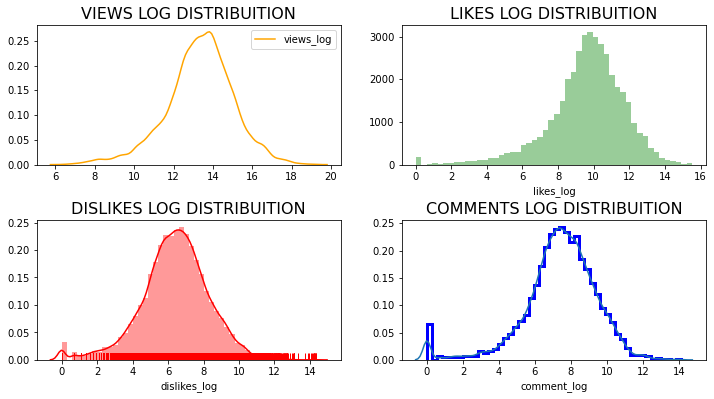

In [8]:
plt.figure(figsize = (12,6)) #setting the figure size to make use of the canvas available

plt.subplot(221) #plot multiple plots in one go
g1 = sns.kdeplot(youtube_df['views_log'], color='orange') #storing the plot in variable so that other measures could be set
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g2 = sns.distplot(youtube_df['likes_log'],color='green',kde=False)
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(youtube_df['dislikes_log'], color='r',rug=True)
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g4 = sns.distplot(youtube_df['comment_log'],hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "b"})
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

**We have used different variants for histrogram itself. So based on the requirement we can beauty the graphs with powerful sns library.**

*Insights captured:*

1. All parameters seems to be normally distributed.
2. Likes logs and comment logs look to be left skewed slightly. 

Let's verify the skewness of the columns as well.

In [9]:
print("Skewness in Dislikes log")
print(youtube_df['dislikes_log'].skew())
print("Skewness in Likes log")
print(youtube_df['likes_log'].skew())
print("Skewness in Comments log")
print(youtube_df['comment_log'].skew())
print("Skewness in Dislikes log")
print(youtube_df['views_log'].skew())

Skewness in Dislikes log
-0.3689548303032646
Skewness in Likes log
-0.9778027518553146
Skewness in Comments log
-0.9507870520349221
Skewness in Dislikes log
-0.39871598718442985


**The skewness values can be interpreted in the following manner:**

1. Highly skewed distribution: If the skewness value is less than −1 or greater than +1.

2. Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.

3. Approximately symmetric distribution: If the skewness value is between −½ and +½.

We can see that skenewss and visualization are in sync. Views and Dislikes logs are approxiamtely symmetrical.

Although Likes and Comments logs are moderately negatively skewed

In [10]:
youtube_df['category_name'] = np.nan #creating new blank column
Category_nbr =[1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,25] #as per json file
Category=['Film and Animation','Cars and Vehicles','Music','Pets and Animals','Sport', 'Travel and Events',
         'Gaming','People and Blogs', 'Comedy', 'Entertainment','News and Politics','How to and Style',
         'Education','Science and Technology','Non Profits and Activism','News & Politics']

for i,j in zip(Category_nbr,Category): #zipping both lits together to loop through both
    youtube_df.loc[youtube_df['category_id'] ==i, 'category_name'] = j  
             
            
     
        

In [11]:
youtube_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,likes_log,views_log,dislikes_log,comment_log,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,10.960027,13.525659,7.995307,9.677528,People and Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",11.484382,14.698775,8.723719,9.449672,Entertainment


Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


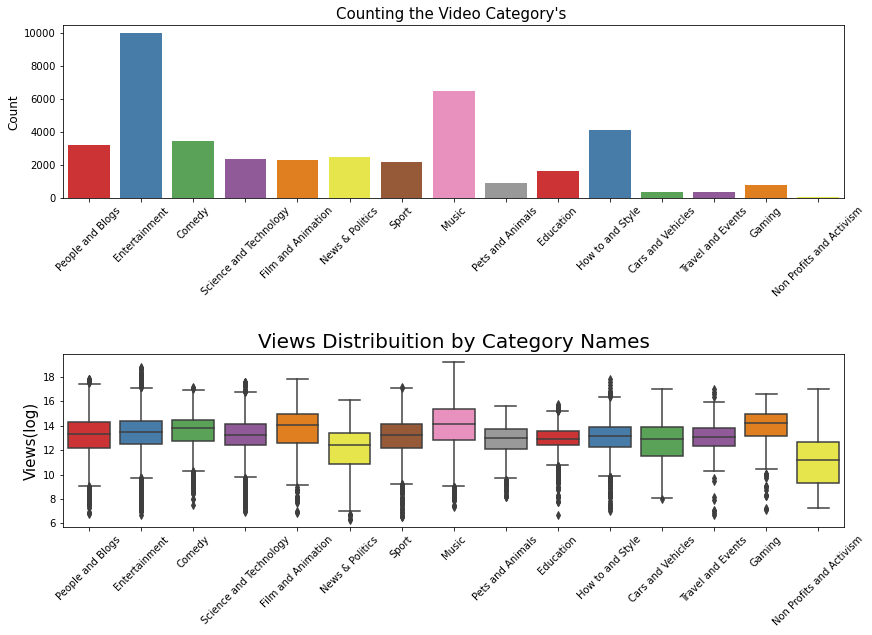

In [12]:
#Checking Views, likes, dislikes distribuition by category_name's

print("Category Name count")
print(youtube_df.category_name.value_counts()[:5]) #print top 5 values

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=youtube_df, palette="Set1") #count for each category for whoel data
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=youtube_df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9) #hspace and top help in spacing between multiple plots

plt.show()

Significant number of politics and news videos.

The unique difference is in Non Profits and Activism videos that have less views than the "normal" videos

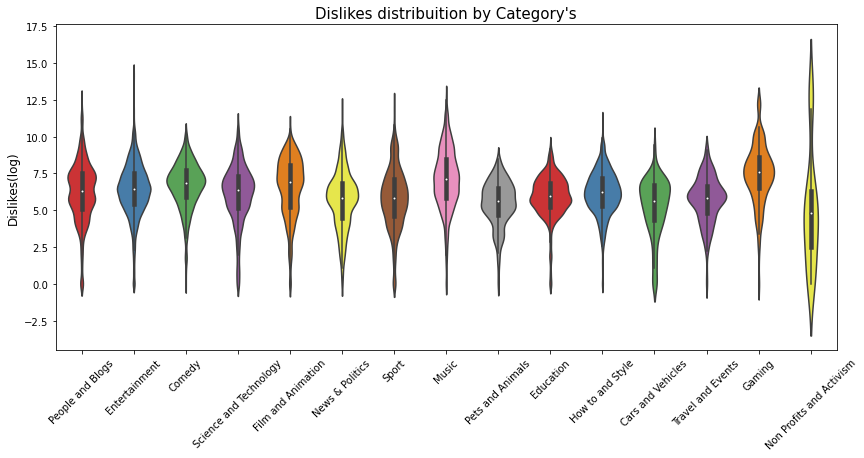

In [13]:
plt.figure(figsize = (14,6))

g = sns.violinplot(x='category_name', y='dislikes_log', data=youtube_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

Non Profit and activism have highest dislikes as well. Almost all categories have outliers present.

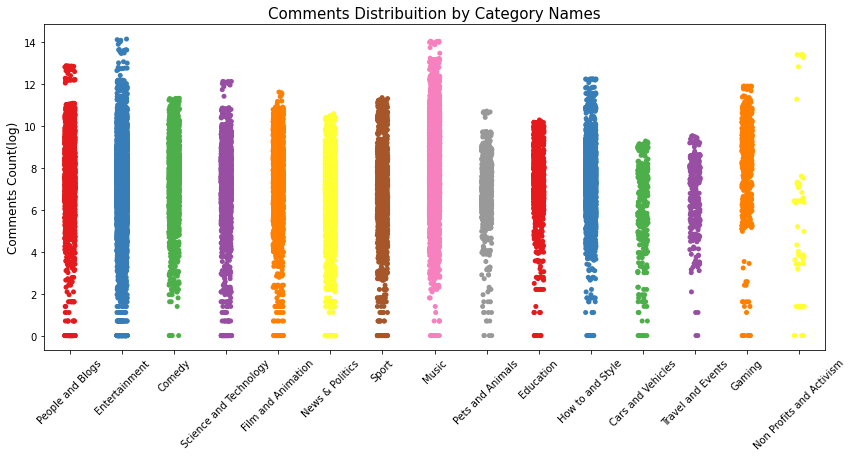

In [14]:
plt.figure(figsize = (14,6))

g = sns.stripplot(x='category_name', y='comment_log', data=youtube_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

Music and Entertainment videos have most of comments as well but there are huge amount of outliers present as well.

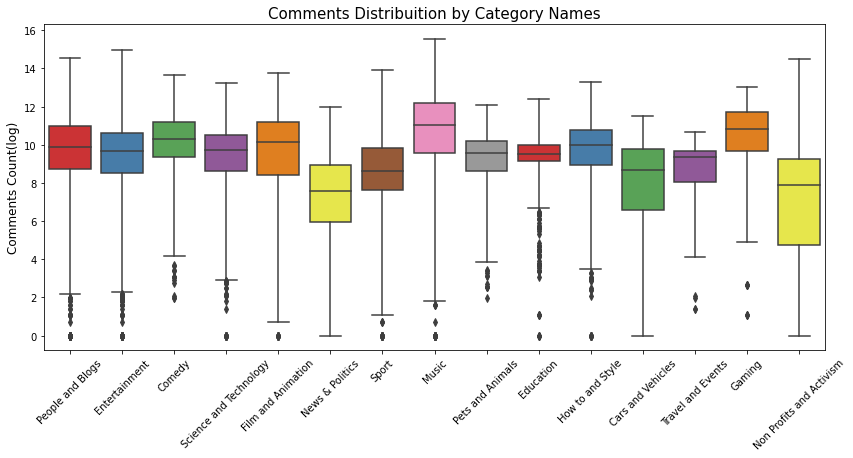

In [15]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=youtube_df, palette="Set1",whis=3)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

Overall we can see here that 'Non Profits and Activism' are not so popular videos whereas videos falling in Music and 
Entertainment catergory have higher engagement.

**Engagement Features**

We have seen this always that % comparision of any parameter adds more value then just the raw parameter.

Generally on youtube we have seen the trend that although views are more but video is not able to cater much likes, dislikes or comments.


In [16]:
youtube_df['like_rate'] =  youtube_df ['likes'] / youtube_df['views'] * 100
youtube_df['dislike_rate'] =  youtube_df ['dislikes'] / youtube_df['views'] * 100
youtube_df['comment_rate'] =  youtube_df ['comment_count'] / youtube_df['views'] * 100

<Figure size 864x1080 with 0 Axes>

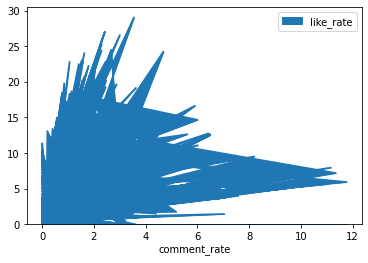

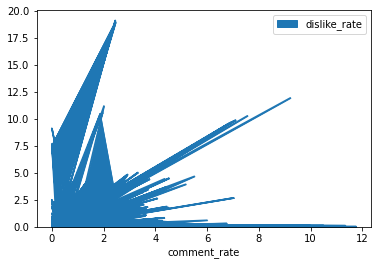

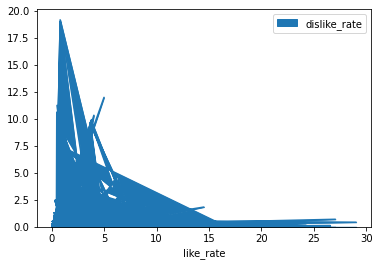

In [17]:
df1=youtube_df[['like_rate','dislike_rate','comment_rate']]

plt.figure(figsize = (12,15))

ax=df1.plot.area(x='comment_rate',y='like_rate')
ax1=df1.plot.area(x='comment_rate',y='dislike_rate')
ax2=df1.plot.area(x='like_rate',y='dislike_rate')

We can see a pattern here that as comments increases likes and dislikes tend to reduce. Intersting observation. Also we can see obvious fact that as likes increases dislikes reduces. 

Let's see another view of it.

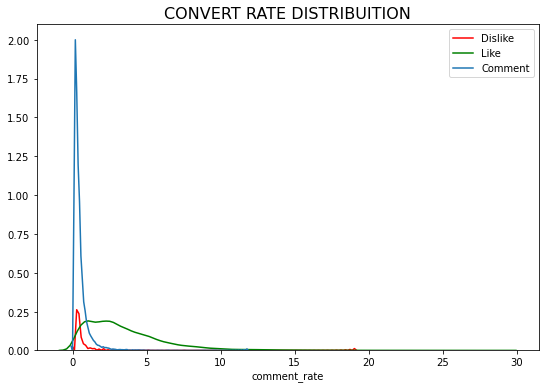

In [18]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(youtube_df['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(youtube_df['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(youtube_df['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

Interesting view to see that like vs dislike have quite a good amount of variation. Comments are huge which is something obvious.

**Let's see what all other columns we have which are yet to be explored**

In [19]:
youtube_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_log', 'category_name', 'like_rate',
       'dislike_rate', 'comment_rate'],
      dtype='object')

**Let's see how many videos fall in either of disabled cateory**

In [20]:

true_count = sum(youtube_df['comments_disabled'])
print("# of videos with comments disabled - %d " %true_count)

true_count = sum(youtube_df['ratings_disabled'])
print("# of videos with ratings disabled - %d " %true_count)

true_count = sum(youtube_df['video_error_or_removed'])
print("# of videos with video error/removed - %d " %true_count)

# of videos with comments disabled - 633 
# of videos with ratings disabled - 169 
# of videos with video error/removed - 23 


In [21]:
#np.logical_and / np.logical_or are used to compare voolean datatype

sum(np.logical_and(youtube_df['video_error_or_removed'],youtube_df['ratings_disabled']))

0

There are no such videos which have all 3 fields disabled together

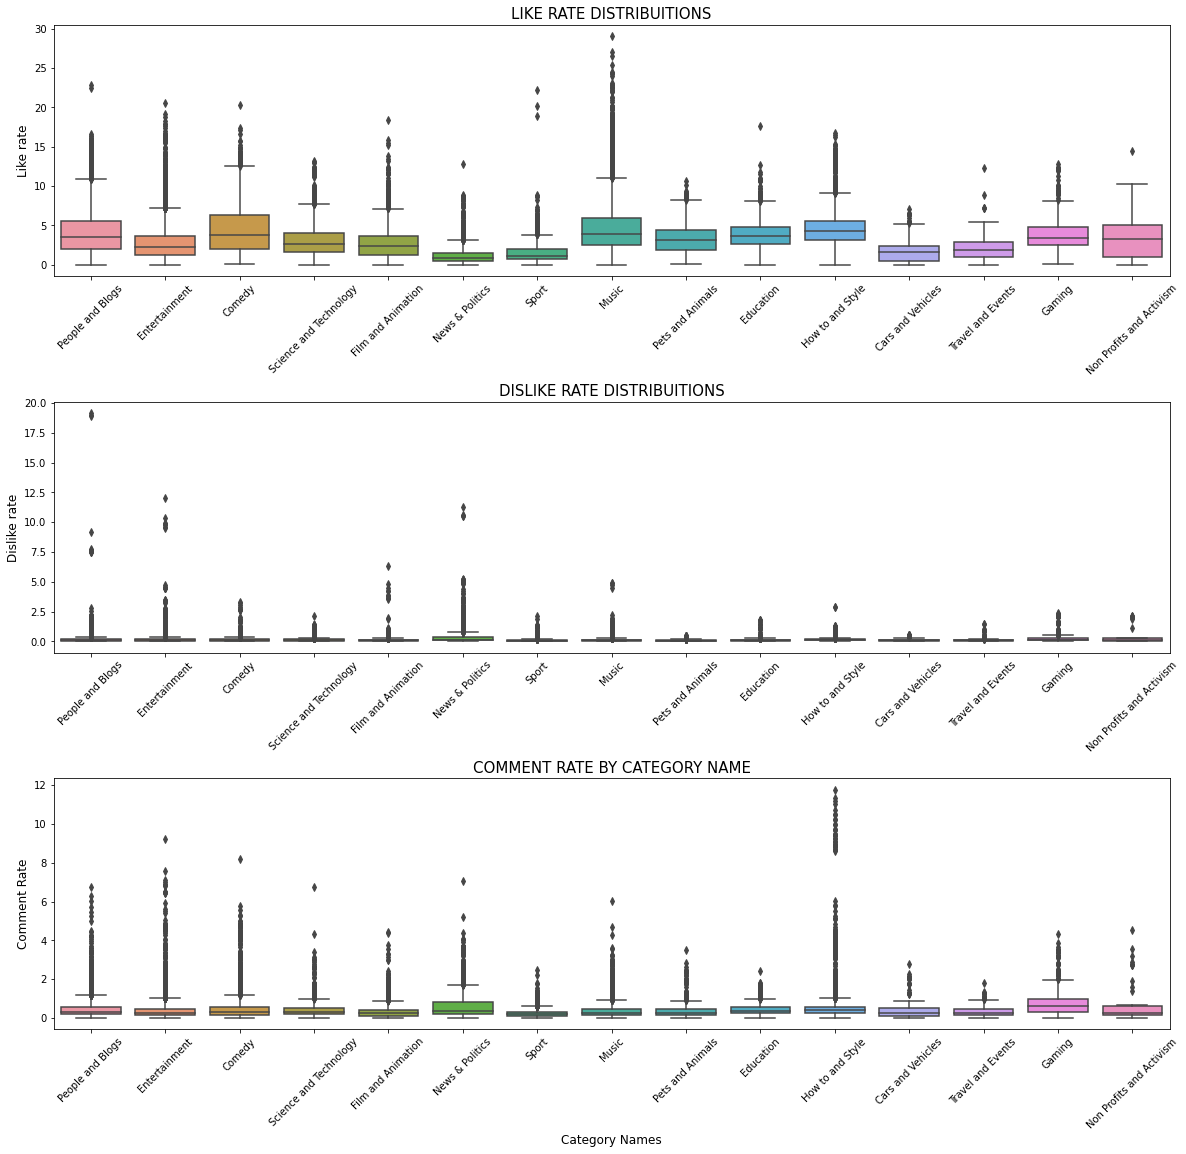

In [22]:
plt.figure(figsize = (20,18))

plt.subplot(3,1,1)
g= sns.boxplot(x='category_name',y='like_rate',  data=youtube_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUITIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(3,1,2)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=youtube_df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUITIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(3,1,3)
g2= sns.boxplot(y='comment_rate', x='category_name', data=youtube_df)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

We can see that the Dislike rate is very low in almost all categories but some outliers in 'People and Blogs' and News & Politics are there which based on domain knowledge looks normal to have.

The mean of like distribuition is less than 5% but in music we have a very interesting pattern of like rate... The music category have the highest engagement rate.

And at the Comment rate we can see the "how-to and style" category with the highest rates of commments. Interesting observation.

In [23]:
youtube_df['publish_time'] = pd.to_datetime(youtube_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [24]:
youtube_df['publish_time_new'] = youtube_df['publish_time'].dt.normalize() #Normalize is used to remove time aspect

In [25]:
youtube_df['trending_date'] = pd.to_datetime(youtube_df['trending_date'], format='%Y-%m-%d')

In [26]:
youtube_df['Days Difference'] = youtube_df['trending_date'] - youtube_df['publish_time_new']

In [27]:
youtube_df['Days Difference'] = youtube_df['Days Difference'].dt.days.astype('int16') #Change data to make it in int format

In [28]:
youtube_df['Days Difference'].dtype

dtype('int16')

In [29]:
youtube_df_2=youtube_df[youtube_df['Days Difference']< 30] #taking 30 days as criteria as most of the videos fall here

Text(0.5, 1.0, 'Days Difference Distribution')

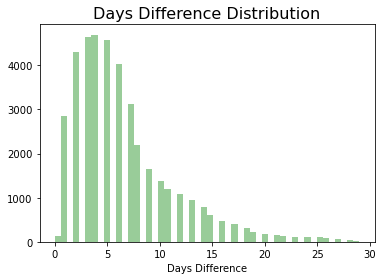

In [30]:
g2 = sns.distplot(youtube_df_2['Days Difference'],color='green',kde=False)
g2.set_title('Days Difference Distribution', fontsize=16)

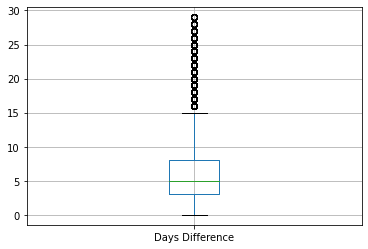

In [31]:
youtube_df_2.boxplot('Days Difference')

If you see here the count of videos having age more than 15 days are reducing significantly. So it means most of the tending videos are with lower age.

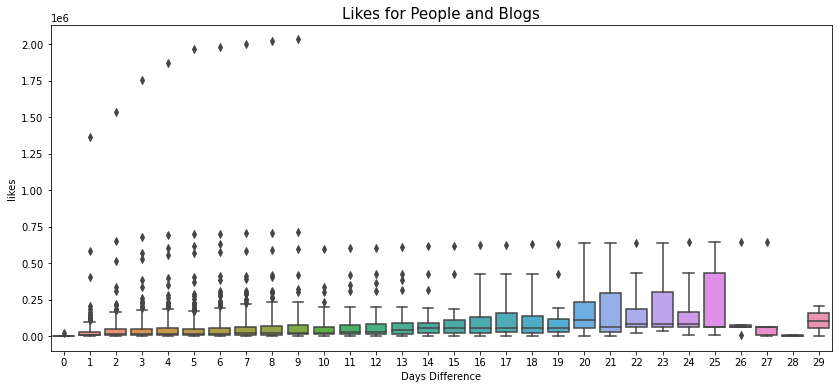

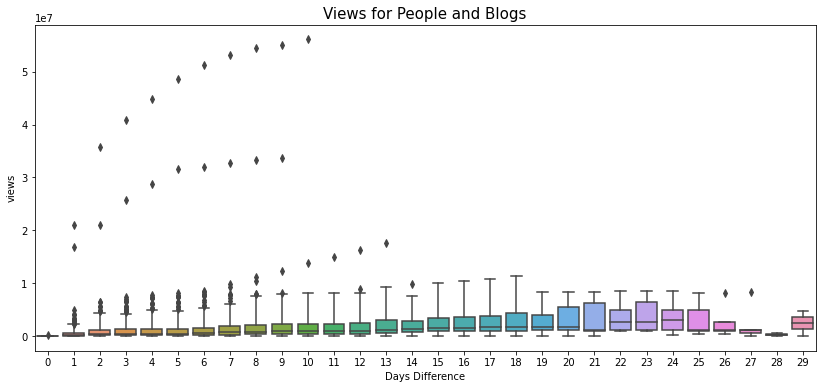

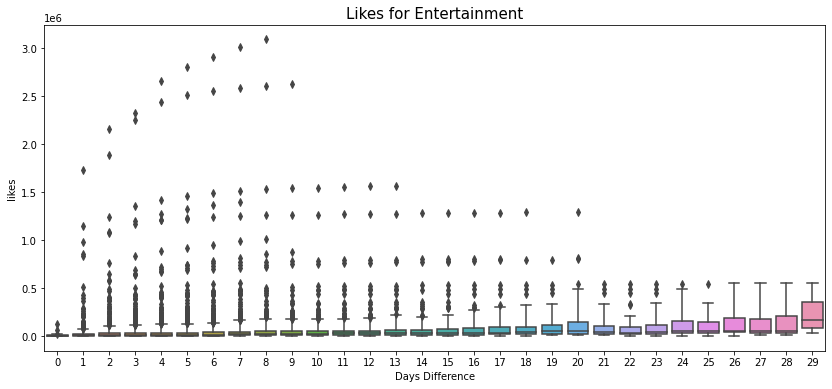

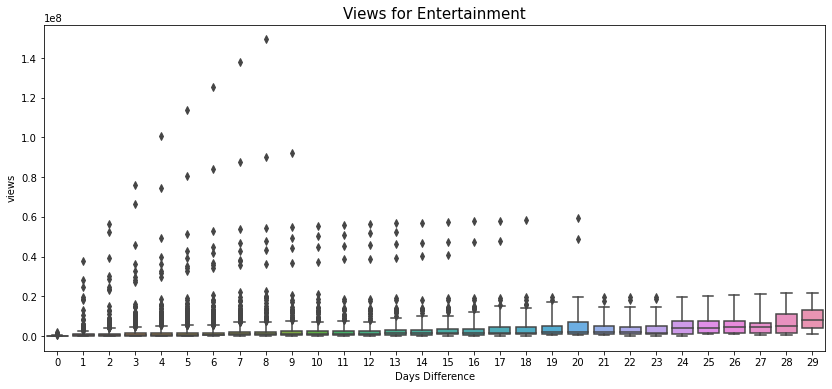

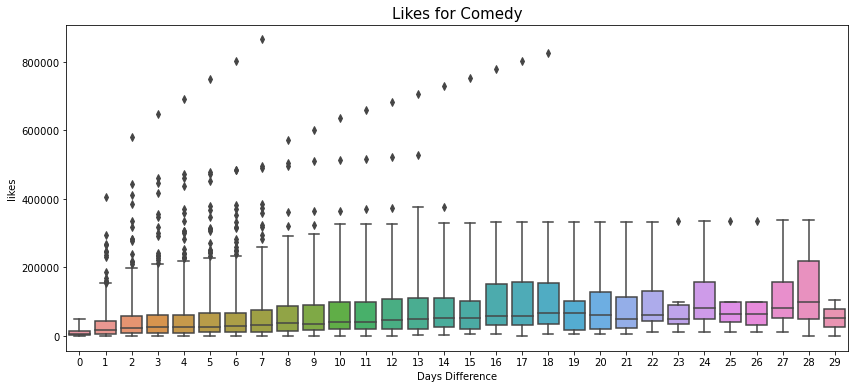

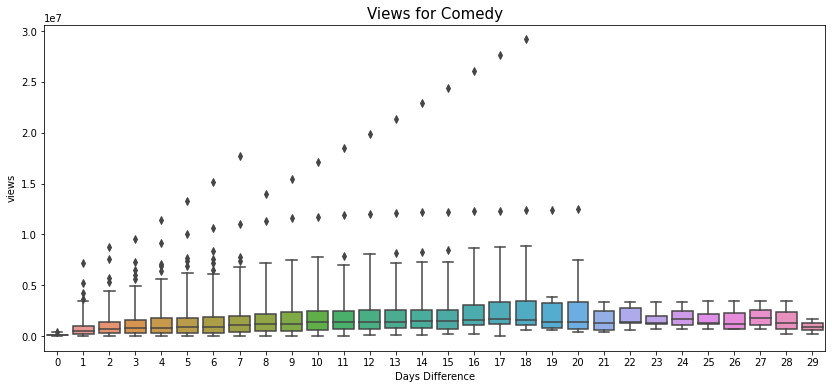

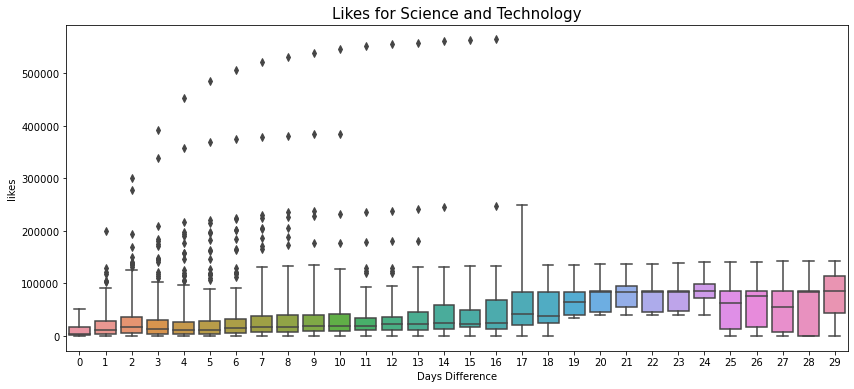

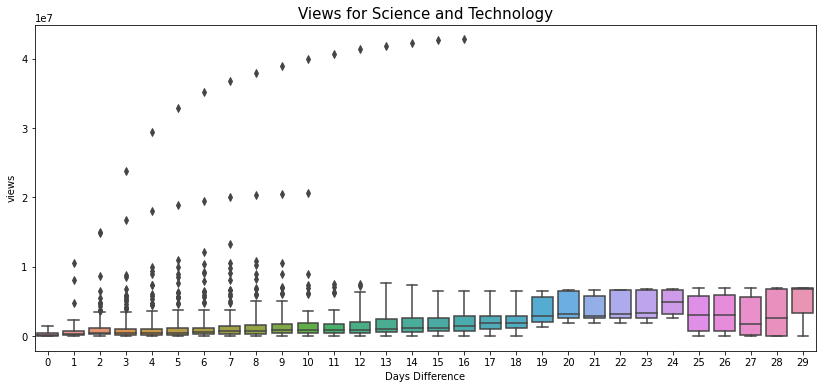

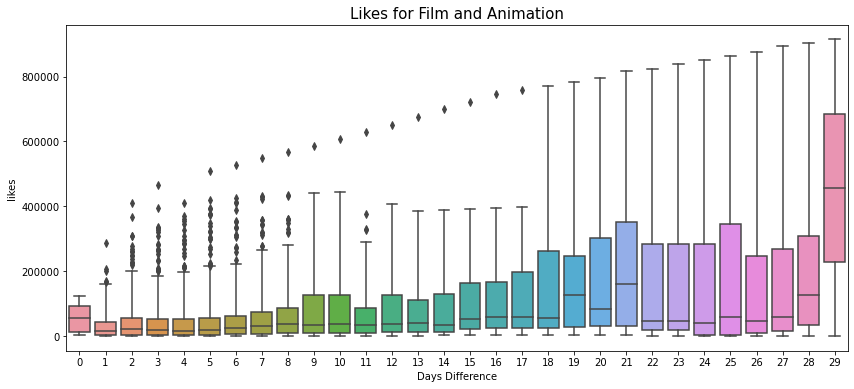

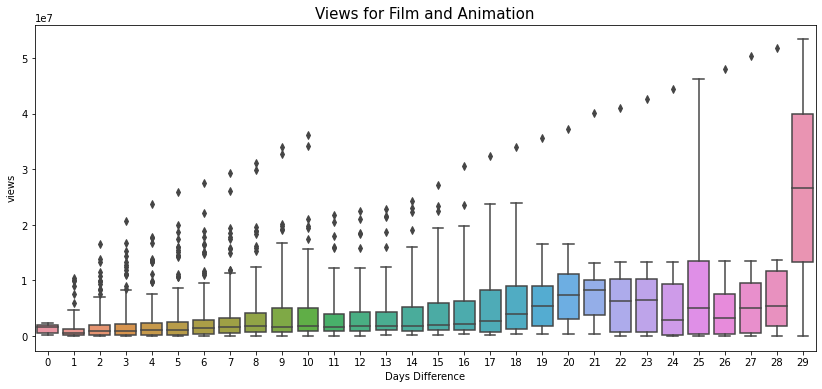

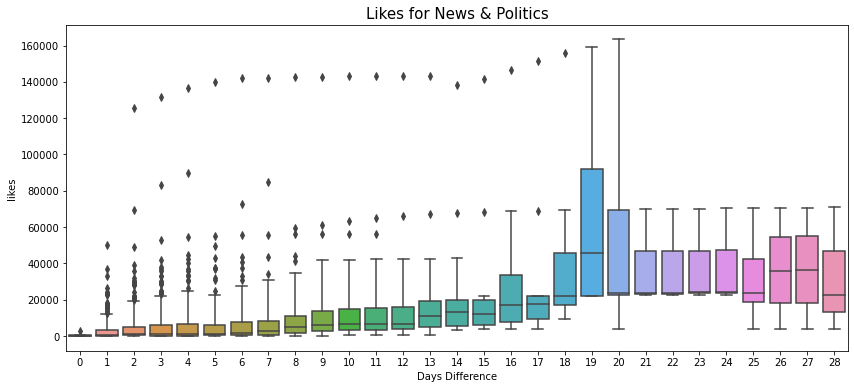

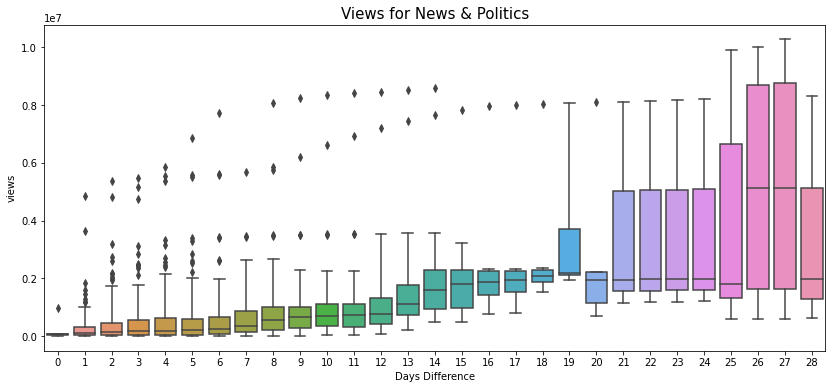

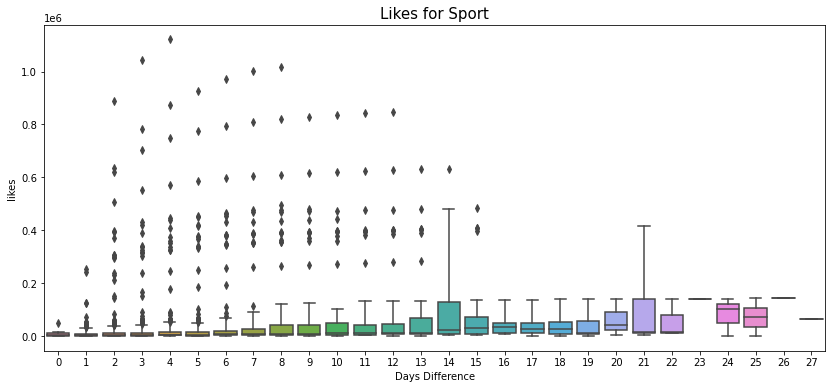

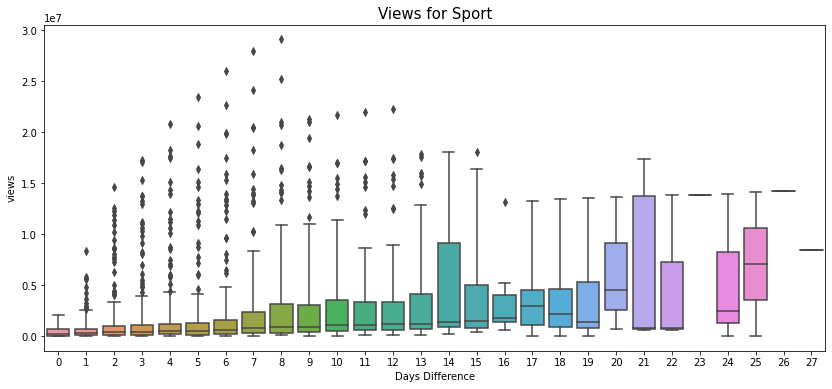

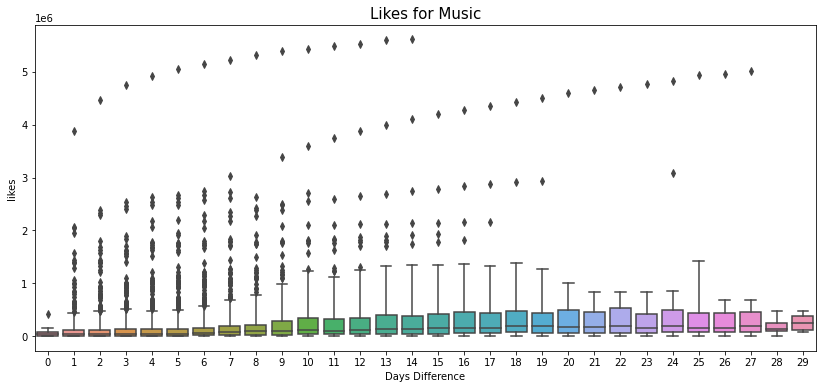

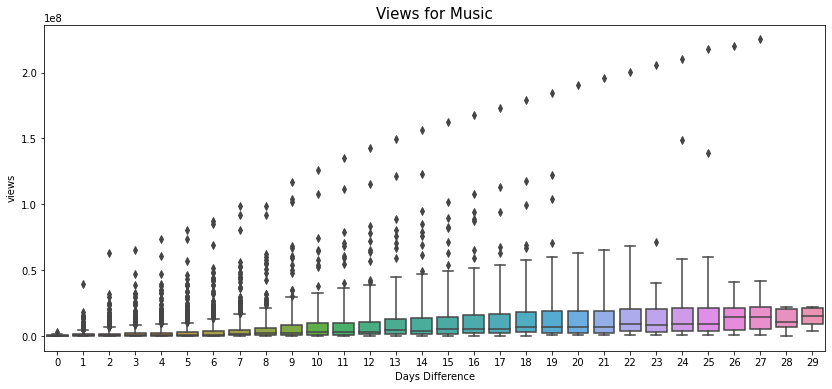

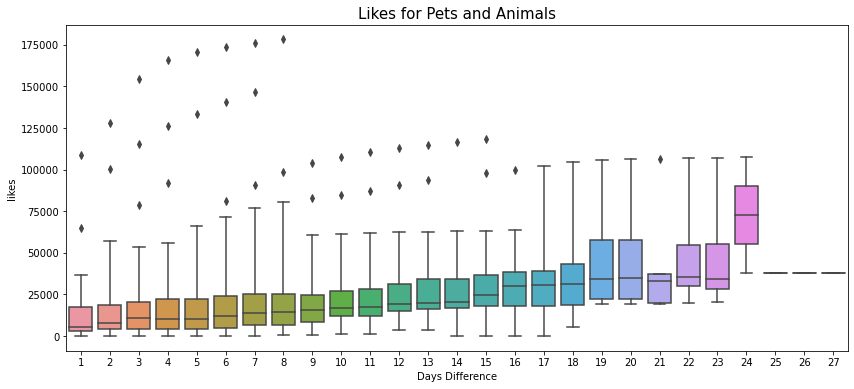

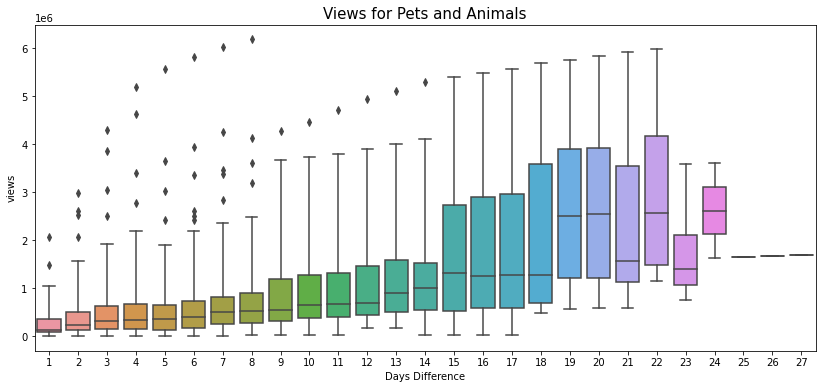

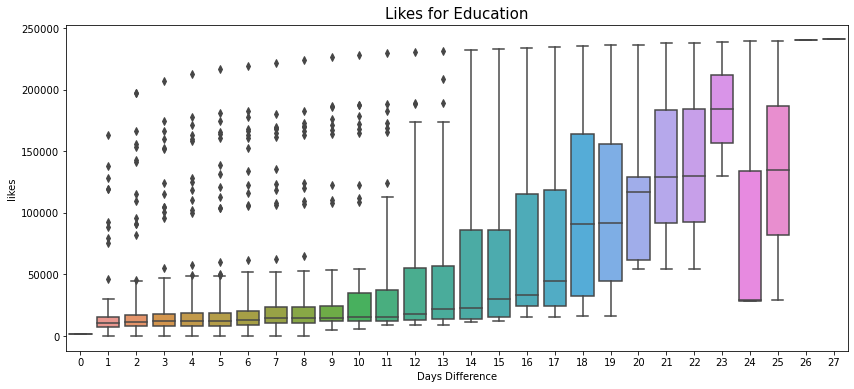

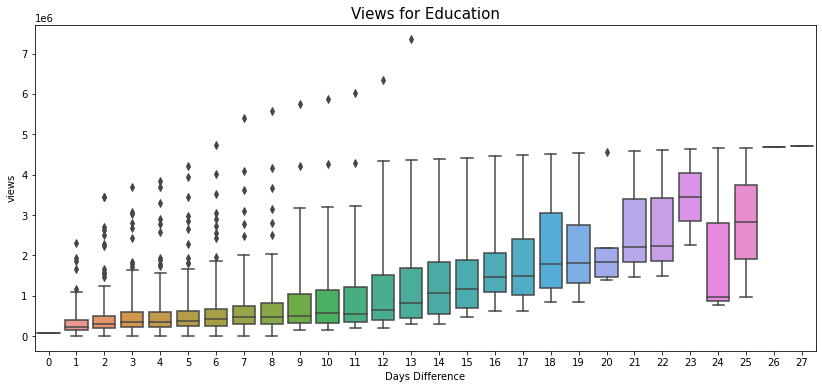

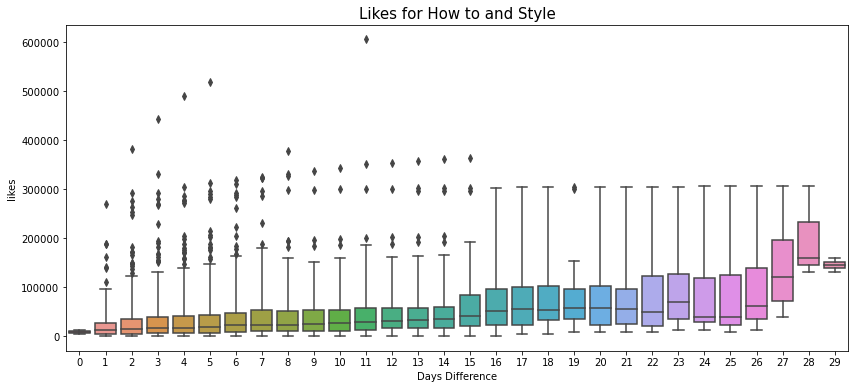

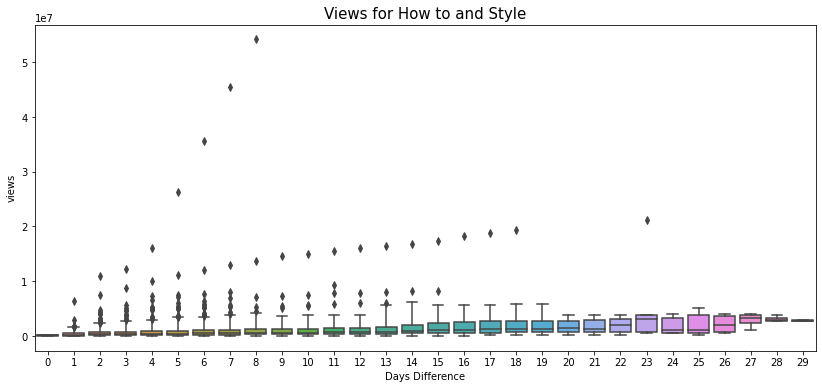

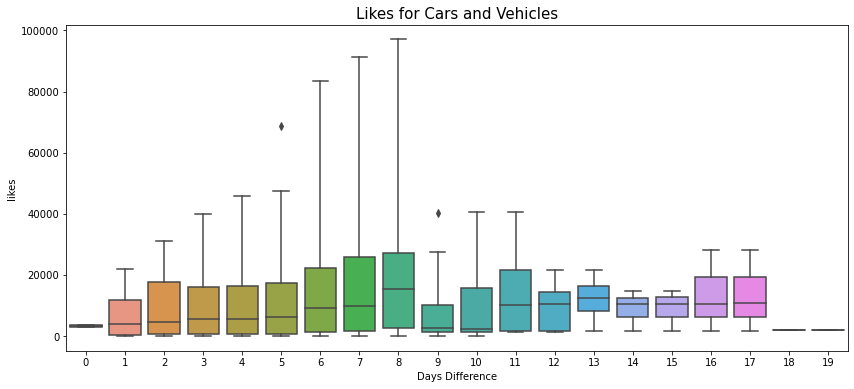

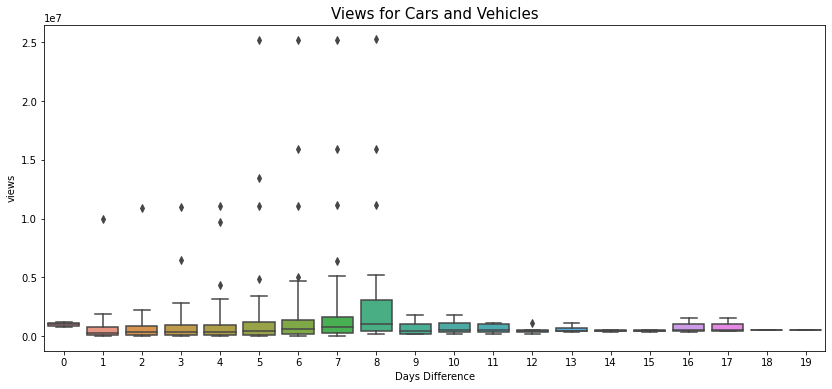

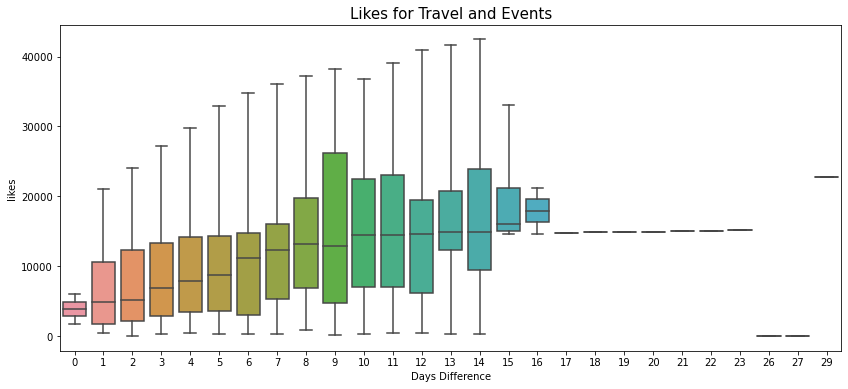

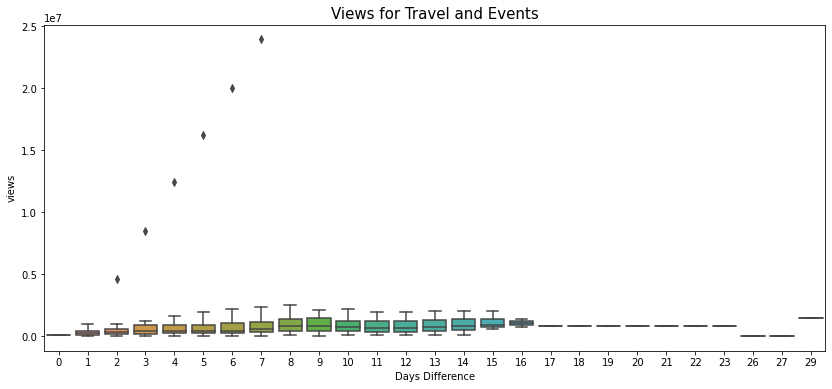

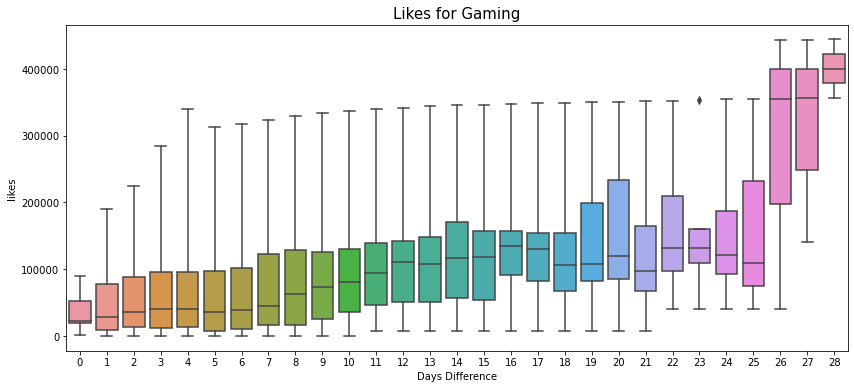

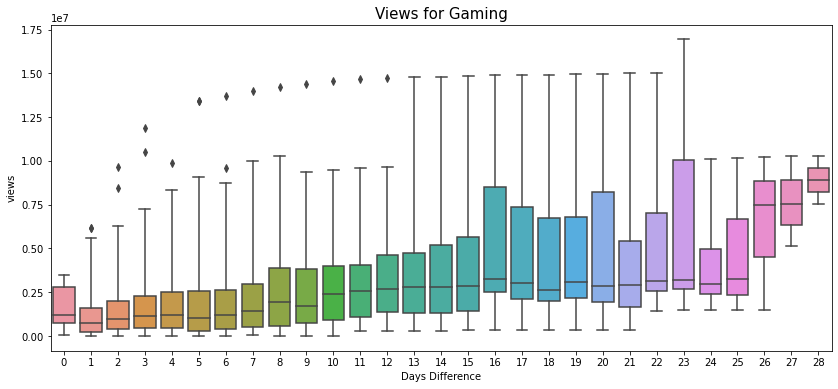

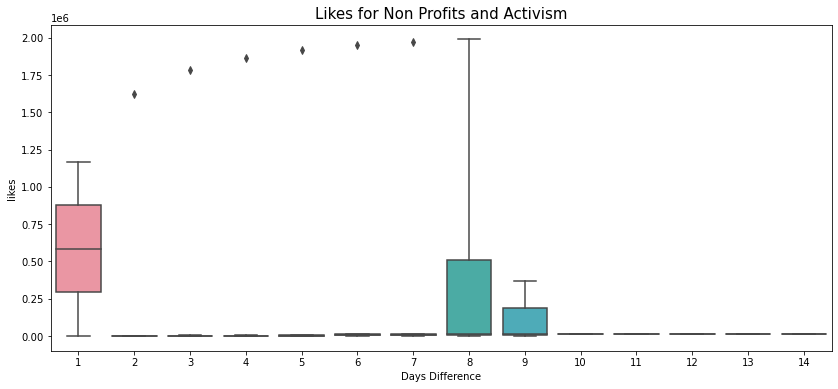

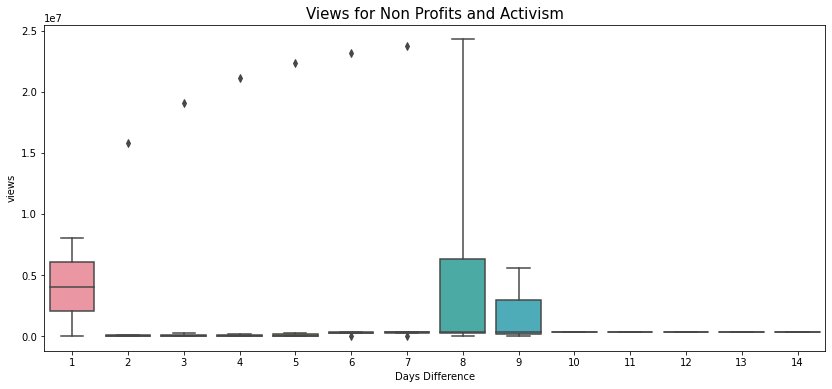

In [32]:

for i in youtube_df_2['category_name'].dropna().unique(): #drop nan value before getting unique count
    youtube_df_i=youtube_df_2[youtube_df_2['category_name']==i] #check for each and every category
    plt.figure(figsize = (14,6))
    g=sns.boxplot('Days Difference','likes',data=youtube_df_i,whis=3) #check age wise distribution for each category for like
    g.set_title("Likes for " +i, fontsize=15) #Have dynamic title
    plt.savefig("Likes "+i+".png") # save the image in working directory
    
    plt.figure(figsize = (14,6))
    p=sns.boxplot('Days Difference','views',data=youtube_df_i,whis=3)
    p.set_title("Views for " +i, fontsize=15)
    plt.savefig("Views "+i+".png")
 


**This is an interesting view to understand how youtube decides on trending video**

As per https://support.google.com/youtube/answer/7239739 we could see that view and age are few of the factors which decide on trening video categorisation. There is an important factor mentioned here as "Temperature" which means that how fast a video is able to generate view. In other words we could also say that lower the video age and higher the views/likes of the video means it is trending.

We could see that most of the categories have age (difference in days between publish date and trending date) ranging from 5 to 15 days whhich shows a increasing trend for like and views.

Although Entertainment, films, music are few such categories of video for which tend to increase in terms of like and views over the period of time. 

So most of the videos even which have lowest age but have more outliers in like and view category. Thus views play a crucial role in deciding the trending video.

In [33]:
#Let's see value count based on month for each category publish 

new_youtube_df = youtube_df.groupby([youtube_df['publish_time'].dt.month]).category_name.value_counts().unstack().fillna(0)


In [34]:
new_youtube_df.head(12)

category_name,Cars and Vehicles,Comedy,Education,Entertainment,Film and Animation,Gaming,How to and Style,Music,News & Politics,Non Profits and Activism,People and Blogs,Pets and Animals,Science and Technology,Sport,Travel and Events
publish_time,,,,,,,,,,,,,,,
1,76.0,408.0,256.0,1236.0,304.0,125.0,508.0,745.0,543.0,21.0,412.0,177.0,328.0,327.0,31.0
2,131.0,494.0,282.0,1335.0,388.0,72.0,623.0,827.0,525.0,13.0,501.0,146.0,454.0,318.0,98.0
3,17.0,510.0,318.0,1665.0,269.0,139.0,766.0,885.0,156.0,0.0,505.0,136.0,376.0,369.0,64.0
4,20.0,424.0,202.0,1215.0,310.0,91.0,573.0,814.0,173.0,0.0,499.0,99.0,295.0,312.0,49.0
5,13.0,582.0,208.0,1740.0,412.0,233.0,629.0,1372.0,287.0,9.0,388.0,125.0,329.0,306.0,23.0
6,0.0,41.0,7.0,246.0,66.0,68.0,69.0,150.0,16.0,0.0,44.0,0.0,24.0,27.0,11.0
7,0.0,0.0,0.0,5.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,7.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0
9,4.0,6.0,4.0,6.0,10.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
new_youtube_df.idxmax(axis=1) #max value for each and every month is from which category

publish_time
1              Entertainment
2              Entertainment
3              Entertainment
4              Entertainment
5              Entertainment
6              Entertainment
7              Entertainment
8     Science and Technology
9         Film and Animation
10        Film and Animation
11             Entertainment
12             Entertainment
dtype: object

If we see monthwise then except for August, September and October most videos available are uder entertainment category.

Category Name count
5     6681
2     6207
12    6182
3     6175
1     5502
Name: month, dtype: int64


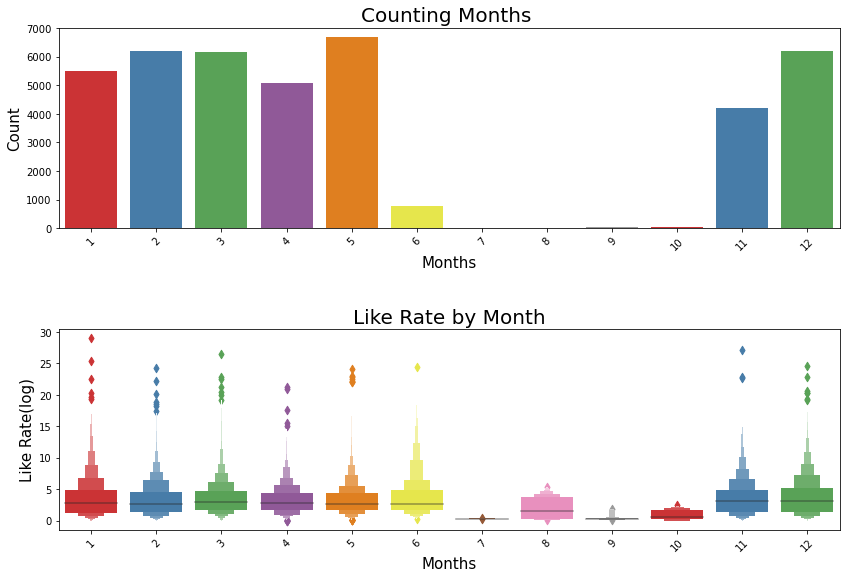

In [36]:

youtube_df['month'] = youtube_df['publish_time'].dt.month

print("Category Name count")
print(youtube_df['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=youtube_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='month', y='like_rate', data=youtube_df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Month", fontsize=20)
g1.set_xlabel("Months", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

**Conclusion:**

1. Most of the videos are from Entertainment category followed by Music
2. On engagement side as well Entertainment and Music top the list.
3. Non Profit and Activism videos have lower rates.
4. More analysis could be done on why there is sudden drop in likes in month from July to October.
5. Who want to use youtube videos for promotion should try to buy space on entertainment or music videos.
6. Youtube should charge more for advertisement on entertainment and music videos.
7. People with low budget on advertisment can get cheaper ad space on other categories like cars and vehicles, non profit and activism, etc.
8. coming to most important part of trending video decision. We could see that videos which are able to generate more views and likes within few days of publishing are moved to trending state.
9. So, age of video is an important factor along with views and likes to decide on trending factor.
10. These are few of the factors but we have so many other factors as well which play a crucial role here in deciding trending factor for youtube video.